In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('https://archive.ics.uci.edu/static/public/911/data.csv')

# Display the first few rows of the dataset
print(df.head())

# Check for basic information about the dataset
print(df.info())

   num_records  recipe_number  recipe_code         recipe_name  \
0            0              1        14299  Creamy White Chili   
1            1              1        14299  Creamy White Chili   
2            2              1        14299  Creamy White Chili   
3            3              1        14299  Creamy White Chili   
4            4              1        14299  Creamy White Chili   

                                        comment_id         user_id  \
0  sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM  u_9iFLIhMa8QaG   
1  sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY  u_Lu6p25tmE77j   
2  sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP  u_s0LwgpZ8Jsqq   
3  sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC  u_fqrybAdYjgjG   
4  sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI  u_XXWKwVhKZD69   

    user_name  user_reputation  created_at  reply_count  thumbs_up  \
0     Jeri326                1  1665619889            0          0   
1     Mark467               50  1665277687

# Separating Rows with stars == 0 #

In [63]:
# Separate rows with stars equal to 0
unknown_attitudes = df[df['stars'] == 0]
known_attitudes = df[df['stars'] != 0]

# Display counts
print("Unknown attitudes count:", len(unknown_attitudes))
print("Known attitudes count:", len(known_attitudes))



Unknown attitudes count: 1696
Known attitudes count: 16486


# EDA on stars, reply_count, and best score #

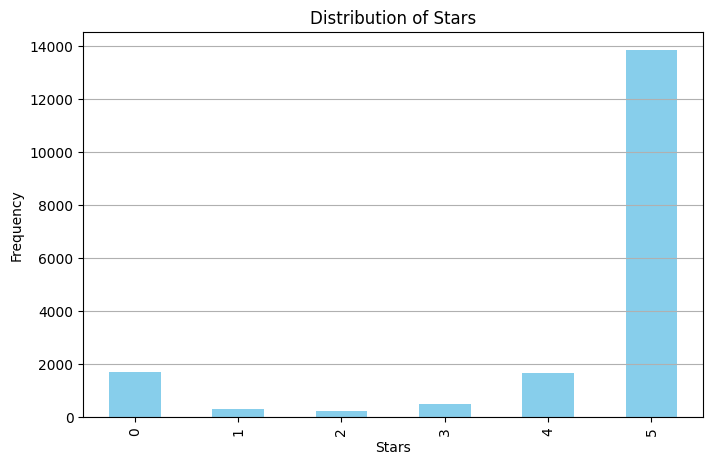

        reply_count     thumbs_up   thumbs_down
count  18182.000000  18182.000000  18182.000000
mean       0.014630      1.089264      0.549335
std        0.137974      4.201004      3.470124
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%        0.000000      0.000000      0.000000
max        3.000000    106.000000    126.000000


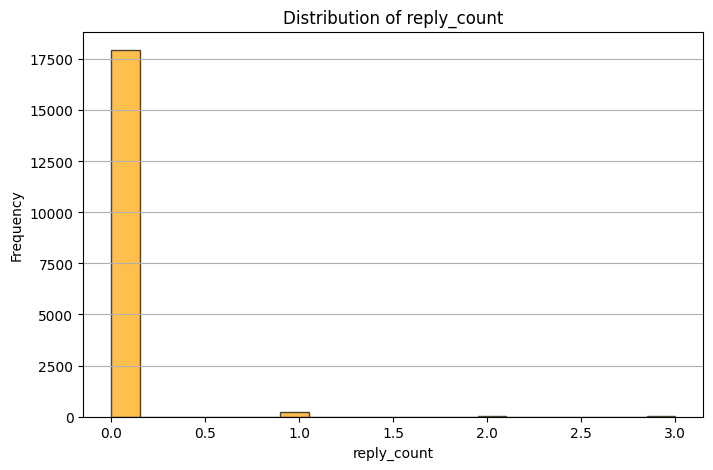

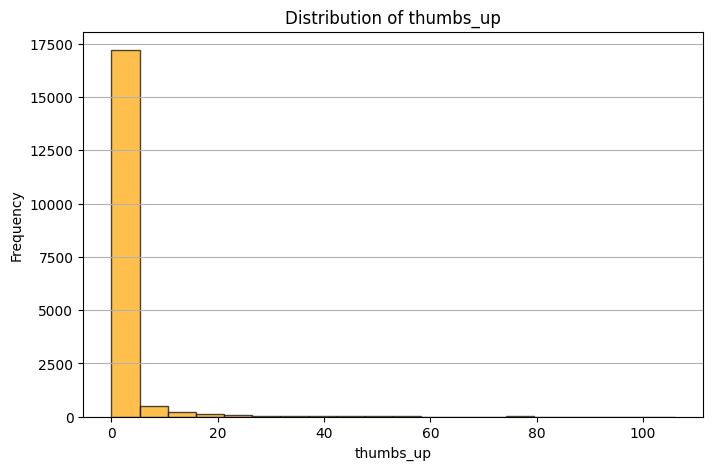

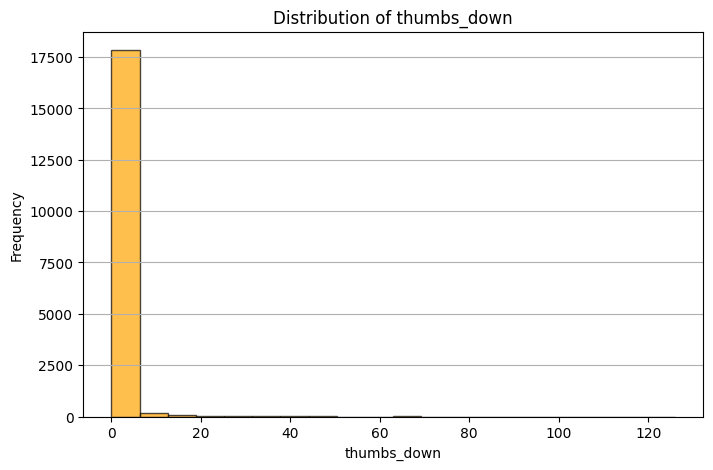

Correlation Matrix:
                stars  reply_count  thumbs_up  thumbs_down  best_score
stars        1.000000    -0.119693  -0.050884    -0.142555   -0.034263
reply_count -0.119693     1.000000   0.208788     0.327620    0.201306
thumbs_up   -0.050884     0.208788   1.000000     0.373251    0.684837
thumbs_down -0.142555     0.327620   0.373251     1.000000    0.215401
best_score  -0.034263     0.201306   0.684837     0.215401    1.000000


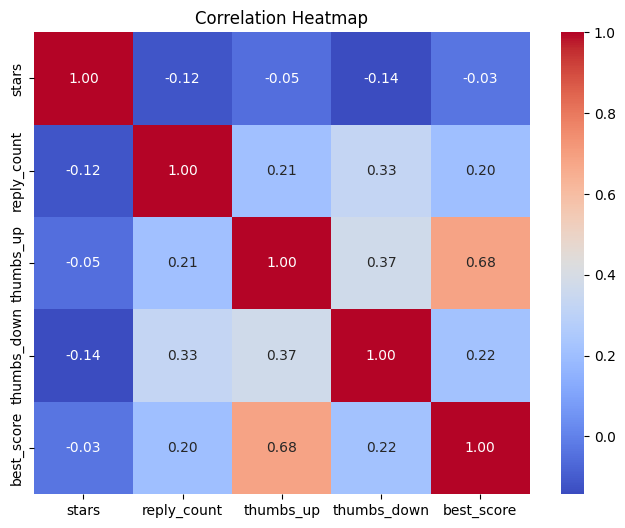

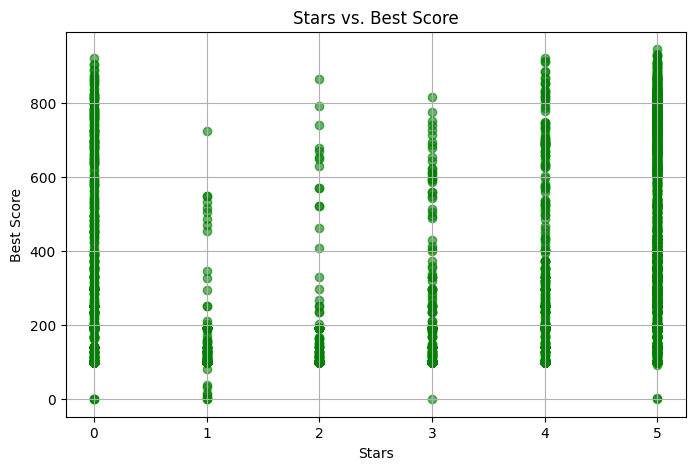

In [64]:
import matplotlib.pyplot as plt

# Plot distribution of stars
plt.figure(figsize=(8, 5))
df['stars'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Summary statistics for reply_count, thumbs_up, thumbs_down
eda_cols = ['reply_count', 'thumbs_up', 'thumbs_down']
print(df[eda_cols].describe())

# Plot histograms for these columns
for col in eda_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=20, color='orange', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

# Correlation matrix
correlation_matrix = df[['stars', 'reply_count', 'thumbs_up', 'thumbs_down', 'best_score']].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap of the correlation matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot: Stars vs. Best Score
plt.figure(figsize=(8, 5))
plt.scatter(df['stars'], df['best_score'], alpha=0.6, c='green')
plt.title('Stars vs. Best Score')
plt.xlabel('Stars')
plt.ylabel('Best Score')
plt.grid(True)
plt.show()


# Step 2: Data Preprocessing #

1. Import Required Libraries

In [65]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download required NLTK packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to /Users/allenyang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/allenyang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/allenyang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


2. Define Text Preprocessing Function
This function will:

Convert text to lowercase.
Remove punctuation, special characters, and numbers.
Tokenize text.
Remove stopwords.
Lemmatize tokens.

In [66]:
def preprocess_text(text):
    # Handle non-string inputs
    if not isinstance(text, str):
        return ""
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a single string
    return ' '.join(tokens)

3. Apply Preprocessing to the Text Data

In [67]:
# Apply preprocessing to the 'text' column
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Display a few examples of cleaned text
print("Original Text:")
print(df['text'].head())
print("\nCleaned Text:")
print(df['cleaned_text'].head())

Original Text:
0    I tweaked it a little, removed onions because ...
1    Bush used to have a white chili bean and it ma...
2    I have a very complicated white chicken chili ...
3    In your introduction, you mentioned cream chee...
4    Wonderful! I made this for a &#34;Chili/Stew&#...
Name: text, dtype: object

Cleaned Text:
0    tweaked little removed onion onion hater house...
1    bush used white chili bean made recipe super s...
2    complicated white chicken chili recipe made ye...
3    introduction mentioned cream cheese none liste...
4    wonderful made chilistew night dinner church e...
Name: cleaned_text, dtype: object


4. Handle Missing Values
Ensure there are no missing values in the relevant columns.

In [68]:
# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Drop rows with missing 'cleaned_text' or 'stars'
df = df.dropna(subset=['cleaned_text', 'stars'])

# Verify no missing values
print("Missing values after handling:")
print(df.isnull().sum())

Missing values before handling:
num_records        0
recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               2
cleaned_text       0
dtype: int64
Missing values after handling:
num_records        0
recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               2
cleaned_text       0
dtype: int64


In [75]:
# Remove rows where 'text' or 'cleaned_text' is missing
df = df.dropna(subset=['text', 'cleaned_text'])

# Verify that there are no missing values now
print("Missing values after cleanup:")
print(df.isnull().sum())

Missing values after cleanup:
num_records          0
recipe_number        0
recipe_code          0
recipe_name          0
comment_id           0
user_id              0
user_name            0
user_reputation      0
created_at           0
reply_count          0
thumbs_up            0
thumbs_down          0
stars                0
best_score           0
text                 0
cleaned_text         0
sentiment            0
sentiment_encoded    0
dtype: int64


5. Encode the Target Variable
Map the stars column to sentiment labels (e.g., "negative" to "positive").

In [78]:
# Define a new sentiment mapping function
def map_sentiment(stars):
    if stars == 5:
        return 'positive'
    elif stars in [4, 3]:
        return 'neutral'
    elif stars in [2, 1]:
        return 'negative'
    else:
        return None  # Explicitly return None for invalid or unknown stars values

# Apply the mapping to the 'stars' column
df['sentiment'] = df['stars'].apply(map_sentiment)

# Remove rows with None in the 'sentiment' column
df = df[df['sentiment'].notna()]

# Display unique values to confirm the mapping is correct
print("Unique values in 'sentiment' column:", df['sentiment'].unique())

# Display a few examples
print("Mapping of Stars to Sentiments:")
print(df[['stars', 'sentiment']].head())


Unique values in 'sentiment' column: ['positive' 'neutral' 'negative']
Mapping of Stars to Sentiments:
   stars sentiment
0      5  positive
1      5  positive
2      5  positive
5      5  positive
6      5  positive


# Step 3: Feature Extraction (Text-Only) #

### 1. Text Vectorization ###
We use TF-IDF Vectorizer to convert the cleaned text into numerical features.

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limit the number of features to 5000 (adjustable)

# Fit and transform the cleaned_text column
tfidf_features = tfidf.fit_transform(df['cleaned_text'])

# Convert TF-IDF features to a DataFrame for better understanding
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf.get_feature_names_out())

# Display the shape and a few rows of the TF-IDF DataFrame
print("TF-IDF Feature Matrix Shape:", tfidf_df.shape)
print(tfidf_df.head())


TF-IDF Feature Matrix Shape: (16484, 5000)
   able  absolute  absolutely  absorb  absorbed  absorbs  absoutly  abundance  \
0   0.0       0.0    0.140676     0.0       0.0      0.0       0.0        0.0   
1   0.0       0.0    0.000000     0.0       0.0      0.0       0.0        0.0   
2   0.0       0.0    0.000000     0.0       0.0      0.0       0.0        0.0   
3   0.0       0.0    0.000000     0.0       0.0      0.0       0.0        0.0   
4   0.0       0.0    0.000000     0.0       0.0      0.0       0.0        0.0   

   abundant  accent  ...  zesty  zing  zip  ziploc  ziplock  zipper  zippy  \
0       0.0     0.0  ...    0.0   0.0  0.0     0.0      0.0     0.0    0.0   
1       0.0     0.0  ...    0.0   0.0  0.0     0.0      0.0     0.0    0.0   
2       0.0     0.0  ...    0.0   0.0  0.0     0.0      0.0     0.0    0.0   
3       0.0     0.0  ...    0.0   0.0  0.0     0.0      0.0     0.0    0.0   
4       0.0     0.0  ...    0.0   0.0  0.0     0.0      0.0     0.0    0.0   

 

### 2. Encode Target Variable ###
Encode the sentiment column into numerical labels to use as the target variable.

In [80]:
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Encode sentiment labels
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Display the mapping of labels
print("Sentiment Label Mapping:")
for sentiment, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{sentiment}: {code}")

# Display the encoded sentiment column
print(df[['sentiment', 'sentiment_encoded']].head())

Sentiment Label Mapping:
negative: 0
neutral: 1
positive: 2
  sentiment  sentiment_encoded
0  positive                  2
1  positive                  2
2  positive                  2
5  positive                  2
6  positive                  2


### 3. Final Dataset Preparation
Prepare the feature matrix (X) and target vector (y).

In [81]:
# Drop rows with invalid or missing sentiment values
df = df[df['sentiment'].notna()]

# Check unique values again to confirm
print("Unique values in sentiment column after cleaning:", df['sentiment'].unique())


Unique values in sentiment column after cleaning: ['positive' 'neutral' 'negative']


In [82]:
# Use the TF-IDF features as X
X = tfidf_df

# Use the encoded sentiment as y
y = df['sentiment_encoded']

# Display the shapes of X and y
print("Feature Matrix Shape (X):", X.shape)
print("Target Vector Shape (y):", y.shape)

Feature Matrix Shape (X): (16484, 5000)
Target Vector Shape (y): (16484,)


# Step 4: Model Implementation #

### Step 4.1: Train-Test Split
1. Before implementing models, split the data into training and testing sets.

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# One-hot encode the target labels
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Display shapes
print("Train Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)
print("Train Target Shape:", y_train_encoded.shape)
print("Test Target Shape:", y_test_encoded.shape)



Train Features Shape: (13187, 5000)
Test Features Shape: (3297, 5000)
Train Target Shape: (13187, 3)
Test Target Shape: (3297, 3)


2. Helper Function for Cross-Validation

We use cross-validation with F1 score as the metric.

In [89]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

# Helper function for cross-validation
def cross_validate_model(model_fn, X, y, n_splits=5, batch_size=32, epochs=5):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    f1_scores = []

    for train_index, val_index in kfold.split(X):
        # Split data
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        # Build model
        model = model_fn()

        # Train model
        model.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=batch_size, verbose=0)

        # Predict on validation data
        y_val_pred = model.predict(X_val_fold)
        y_val_pred_classes = np.argmax(y_val_pred, axis=1)
        y_val_true_classes = np.argmax(y_val_fold, axis=1)

        # Calculate F1 score
        f1 = f1_score(y_val_true_classes, y_val_pred_classes, average='weighted')
        f1_scores.append(f1)

    return np.mean(f1_scores), np.std(f1_scores)





### Step 4.2: Implement Deep Learning Models
1. Feedforward Neural Network (FFN)

In [90]:
import tensorflow as tf

def build_ffn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(3, activation='softmax')  # 3 sentiment classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Perform cross-validation
ffn_mean_f1, ffn_std_f1 = cross_validate_model(build_ffn_model, X_train.to_numpy(), y_train_encoded, epochs=10)
print(f"FFN Cross-Validation F1 Score: {ffn_mean_f1:.4f} ± {ffn_std_f1:.4f}")



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
FFN Cross-Validation F1 Score: 0.8304 ± 0.0052


2. Recurrent Neural Network (RNN)

In [ ]:
def build_rnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=5000, output_dim=128, input_length=X_train.shape[1]),
        tf.keras.layers.SimpleRNN(128, return_sequences=False),
        tf.keras.layers.Dense(3, activation='softmax')  # 3 sentiment classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Perform cross-validation
rnn_mean_f1, rnn_std_f1 = cross_validate_model(build_rnn_model, X_train.to_numpy(), y_train_encoded, epochs=10)
print(f"RNN Cross-Validation F1 Score: {rnn_mean_f1:.4f} ± {rnn_std_f1:.4f}")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


3. Bidirectional LSTM (BiLSTM)

In [ ]:
def build_bilstm_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=5000, output_dim=128, input_length=X_train.shape[1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=False)),
        tf.keras.layers.Dense(3, activation='softmax')  # 3 sentiment classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Perform cross-validation
bilstm_mean_f1, bilstm_std_f1 = cross_validate_model(build_bilstm_model, X_train.to_numpy(), y_train_encoded, epochs=10)
print(f"BiLSTM Cross-Validation F1 Score: {bilstm_mean_f1:.4f} ± {bilstm_std_f1:.4f}")
